In [1]:
import numpy as np
import time
import cv2
from boosting_classifier import Boosting_Classifier
from visualizer import Visualizer
from im_process import normalize
from utils import *

In [8]:
flag_subset = True
boosting_type = 'Ada' #'Real' or 'Ada'
training_epochs = 100 if not flag_subset else 20
act_cache_dir = 'wc_activations.npy' if not flag_subset else 'wc_activations_subset.npy'
chosen_wc_cache_dir = 'chosen_wcs.pkl' if not flag_subset else 'chosen_wcs_subset.pkl'

In [15]:
#data configurations
pos_data_dir = '../newface16'
neg_data_dir = '../nonface16'
image_w = 16
image_h = 16
data, labels = load_data(pos_data_dir, neg_data_dir, image_w, image_h, flag_subset)
data = integrate_images(normalize(data))

Load in 200 images, 100 faces, 100 non-faces


In [22]:
#number of bins for boosting
num_bins = 25

#number of cpus for parallel computing
num_cores = 8 if not flag_subset else 1 #always use 1 when debugging

In [5]:
#create Haar filters
filters = generate_Haar_filters(4, 4, 16, 16, image_w, image_h, flag_subset)

In [6]:
#create visualizer to draw histograms, roc curves and best weak classifier accuracies
drawer = Visualizer([10, 20, 50, 100], [1, 10, 20, 50, 100])

In [23]:
#create boost classifier with a pool of weak classifier
boost = Boosting_Classifier(filters, data, labels, training_epochs, num_bins, drawer, num_cores, boosting_type)

In [25]:
#calculate filter values for all training images
start = time.clock()
boost.calculate_training_activations(act_cache_dir, act_cache_dir)
end = time.clock()
print('%f seconds for activation calculation' % (end - start))

Calcuate activations for 1000 weak classifiers, using 200 imags.
[Find cached activations, wc_activations_subset.npy loading...]
0.003042 seconds for activation calculation


In [21]:
first_wc = boost.weak_classifiers[0]
type(first_wc.apply_filter)

method

In [ ]:
boost.train(chosen_wc_cache_dir)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


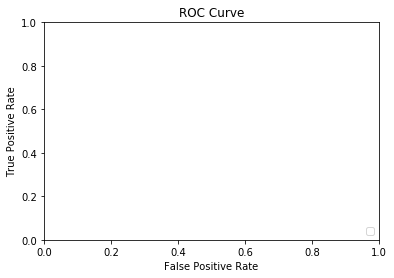

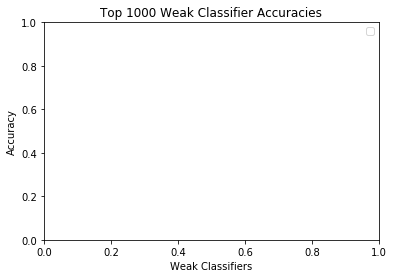

In [14]:
boost.visualize()

In [ ]:
original_img = cv2.imread('../Testing_Images/Face_1.jpg', cv2.IMREAD_GRAYSCALE)
result_img = boost.face_detection(original_img)
cv2.imwrite('Result_img_%s.png' % boosting_type, result_img)